In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
indicator_data = pd.read_csv('Indicator_based_RL/indicator_dataset.csv')

In [3]:
labels = pd.read_csv('new_labels.csv')

In [4]:
google_data = pd.concat([indicator_data.iloc[:,:-24], labels], axis=1)

In [5]:
google_data = google_data.drop([218829, 218828], axis=0)

In [6]:
rename_dict = {'bar:open':'bar_open',
              'bar:low':'bar_low',
              'bar:close':'bar_close',
              'bar:high':'bar_high'}

In [7]:
google_data = google_data.rename(rename_dict, axis='columns')

In [8]:
time_column = []
sep_1 = int(2*len(google_data)/5)
sep_2 = int(len(google_data)/2)
for ind in range(0, sep_1):
    time_column.append('TRAIN')
for ind in range(sep_1, sep_2):
    time_column.append('VALIDATE')
for ind in range(sep_2, len(google_data)):
    time_column.append('TEST')

In [88]:
google_data['TIME_SEP'] = time_column

In [9]:
google_data = google_data.drop('time', axis=1)

In [10]:
weights_values = google_data['volume'].values
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1000))
weights_scaled = scaler.fit_transform(weights_values.reshape(-1,1))
google_data['volume']=weights_scaled

In [11]:
for ind, vol in enumerate(google_data['volume']):
    if vol>800:
        print('Volume: {}   Index: {}'.format(vol, ind))

Volume: 963.826910724877   Index: 17036
Volume: 977.8628388849562   Index: 75827
Volume: 1000.0   Index: 77095
Volume: 808.999180034384   Index: 223827
Volume: 842.3312114445336   Index: 381076


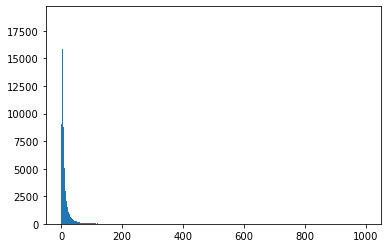

In [12]:
plt.hist(google_data['volume'].values, bins = 3000)
plt.savefig('volume_hit')

In [13]:
google_data = google_data.drop('ABANDONEDBABY', axis=1)

In [14]:
google_data.head()

,price,volume,bar_open,bar_low,bar_high,bar_close,ADI,ADIPositiveDirectionalIndex,ADINegativeDirectionalIndex,ADXR12,...,label_1,reversed_label_1,timestamps_1,label_2,reversed_label_2,timestamps_2,reg_labels_0.25,reg_labels_0.5,reg_labels_1,reg_labels_2
0,135.38,23.784928,135.49,135.26,135.50,135.38,82.307063,3.033442,0.127029,36.712173,...,1,0,4,1,0,13,2.13,2.13,3.53,16.56
1,135.27,28.013743,135.34,135.26,135.50,135.27,82.332535,3.024912,0.117918,36.406090,...,1,0,4,1,0,13,2.24,2.24,3.64,16.67
2,135.49,22.951273,135.26,135.16,135.59,135.49,82.356481,3.016408,0.127142,35.646755,...,1,0,4,1,0,13,2.02,2.02,3.42,16.45
3,136.29,102.064561,135.45,135.27,136.41,136.29,82.382548,3.152866,0.118024,34.730083,...,1,0,12,1,0,18,1.22,1.22,3.10,3.10
4,137.51,188.542509,136.30,136.28,137.57,137.51,82.410753,3.348975,0.109559,35.243895,...,1,0,17,1,0,668,-0.64,-1.09,1.40,14.43


In [16]:
google_data.to_csv('gluon_data.csv', index = False)